In [1]:
setwd('C:/Users/yizhe/Desktop/data_550/miniposter/')

In [2]:
# Load the datasets
air <- read.csv("air.csv")
source("airports.R")
source("cancellations.R")
source("FlightBehaviour.R")

In [3]:
# Subset to obtains the US airline flight data
US <- subset(air, UniqueCarrier == 'US')
head(US)

,X,Dest,Origin,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2,2,ABE,CLT,1,5,6,2034,1945,2155,2117,...,6,14,0,,0,38,0,0,0,0
12,12,ABE,CLT,7,31,4,2012,2015,2225,2158,...,4,55,0,,0,0,0,27,0,0
18,18,ABE,CLT,3,25,2,1942,1945,2118,2124,...,5,14,0,,0,NA,NA,NA,NA,NA
36,36,ABE,CLT,5,6,2,1943,1945,2109,2124,...,3,7,0,,0,NA,NA,NA,NA,NA
51,51,ABE,CLT,2,9,6,1940,1945,2101,2124,...,4,12,0,,0,NA,NA,NA,NA,NA
60,60,ABE,CLT,5,1,4,1950,1945,2122,2124,...,4,17,0,,0,NA,NA,NA,NA,NA


In [4]:
# Drop NA values in the dataset
US_NNA <- US[complete.cases(US[ , c("ArrDelay","DepDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay")]), ]
head(US_NNA,3)

,X,Dest,Origin,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2,2,ABE,CLT,1,5,6,2034,1945,2155,2117,...,6,14,0,,0,38,0,0,0,0
12,12,ABE,CLT,7,31,4,2012,2015,2225,2158,...,4,55,0,,0,0,0,27,0,0
199,199,ABE,CLT,9,12,5,2052,2000,2215,2139,...,5,10,0,,0,0,0,0,0,36


In [5]:
# Exploring dataset
ori_name <- unique(US_NNA$Origin)
dest_name <- unique(US_NNA$Dest)

In [6]:
# Adding latitude and longitude information from the airport.R dataframe to our air dataframe
listofdfs <- list()
for(item in ori_name){
    latOrigin <- subset(airports,iata_code==item)['latitude_deg'][1,]
    longOrigin <- subset(airports,iata_code==item)['longitude_deg'][1,]
    s <- subset(US_NNA, Origin==item)
    s$latOrigin <- latOrigin
    s$longOrigin <- longOrigin
    listofdfs[[item]] <- s
}


US_NNA <- do.call("rbind", listofdfs)

listofdfs <- list()
for(item in dest_name){
    latDest <- subset(airports,iata_code==item)['latitude_deg'][1,]
    longDest <- subset(airports,iata_code==item)['longitude_deg'][1,]
    s <- subset(US_NNA, Dest==item)
    s$latDest <- latDest
    s$longDest <- longDest
    listofdfs[[item]] <- s
}
US_NNA <- do.call("rbind", listofdfs)
head(US_NNA)

,X,Dest,Origin,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,latOrigin,longOrigin,latDest,longDest
ABE.CLT.2,2,ABE,CLT,1,5,6,2034,1945,2155,2117,...,0,38,0,0,0,0,35.214,-80.9431,40.6521,-75.4408
ABE.CLT.12,12,ABE,CLT,7,31,4,2012,2015,2225,2158,...,0,0,0,27,0,0,35.214,-80.9431,40.6521,-75.4408
ABE.CLT.199,199,ABE,CLT,9,12,5,2052,2000,2215,2139,...,0,0,0,0,0,36,35.214,-80.9431,40.6521,-75.4408
ABE.CLT.213,213,ABE,CLT,2,23,6,2007,1945,2146,2124,...,0,9,0,0,0,13,35.214,-80.9431,40.6521,-75.4408
ABE.CLT.240,240,ABE,CLT,8,26,2,2059,2015,2220,2158,...,0,0,0,11,0,11,35.214,-80.9431,40.6521,-75.4408
ABE.CLT.251,251,ABE,CLT,12,12,5,2037,2000,2233,2135,...,0,0,0,21,0,37,35.214,-80.9431,40.6521,-75.4408


In [7]:
# Adding US airline visits at each airport to the airport.R dataframe
c <- as.data.frame(table(US_NNA$Dest))
d <- as.data.frame(table(US_NNA$Origin))
df <- merge(c,d,by="Var1",all=TRUE)
df$US_visits <- df$Freq.x + df$Freq.y
colnames(df)[1] <- c("iata_code")
head(df)

iata_code,Freq.x,Freq.y,US_visits
ABE,65,31,96
ABI,0,0,0
ABQ,207,170,377
ABY,0,0,0
ACK,0,0,0
ACT,0,0,0


In [8]:
airports <- merge(x=airports,y=df,by='iata_code',all.x=TRUE)
head(airports)

iata_code,latitude_deg,longitude_deg,elevation_ft,NDepartures,NArrivals,Cancelled,Freq.x,Freq.y,US_visits
ABE,40.6521,-75.4408,393,4807,4795,152,65,31,96
ABI,32.4113,-99.6819,1791,2660,2661,43,0,0,0
ABQ,35.0402,-106.6090,5355,41146,41144,333,207,170,377
ABY,31.5355,-84.1945,197,1095,1095,17,0,0,0
ACK,41.2531,-70.0602,47,457,469,38,0,0,0
ACT,31.6113,-97.2305,516,1993,1994,74,0,0,0


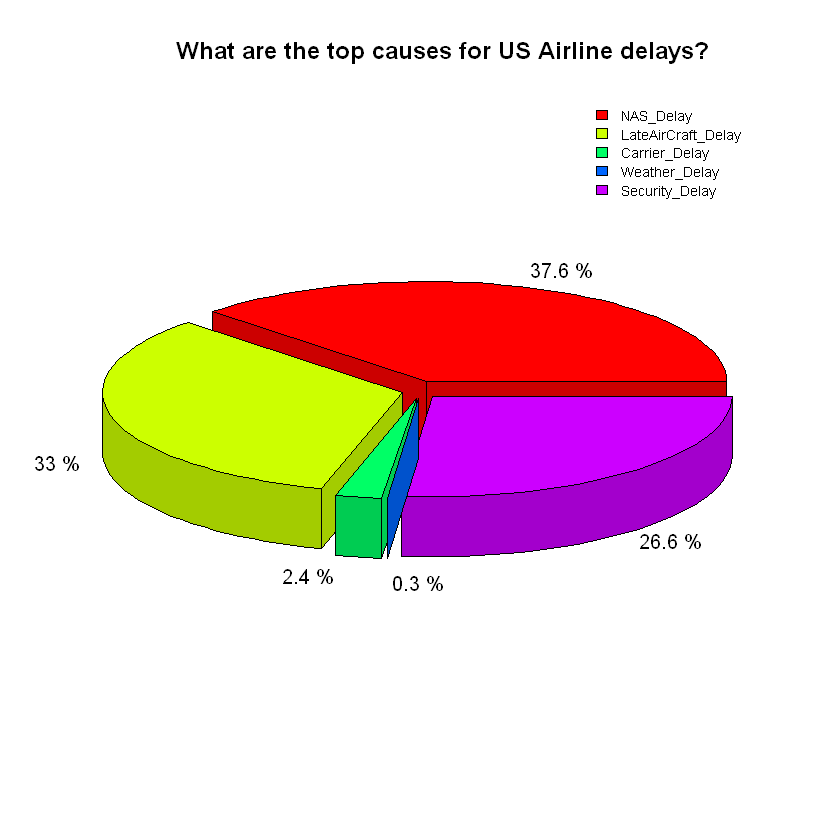

In [9]:
# Create data for the pie graph.
carrier_delay <- sum(US_NNA$CarrierDelay)
weather_delay <- sum(US_NNA$WeatherDelay)
NAS_delay <- sum(US_NNA$NASDelay)
security_delay <- sum(US_NNA$SecurityDelay)
lateaircraft_delay <- sum(US_NNA$LateAircraftDelay)
counts <- c(NAS_delay, lateaircraft_delay, weather_delay, security_delay,carrier_delay)
x <- counts
labels <- c("NAS_Delay","LateAirCraft_Delay","Security_Delay","Weather_Delay","Carrier_Delay")
piepercent<- paste(as.character(round(100*x/sum(x), 1)),"%")

# Plot the 3D pie-chart showing contributions to the total delay by delay categories
library(plotrix)                
pie3D(x, labels = piepercent, labelcex = 1,col = rainbow(length(x)),explode=0.06)
legend("topright", c("NAS_Delay","LateAirCraft_Delay","Carrier_Delay","Weather_Delay","Security_Delay"), cex = 0.7,
   fill = rainbow(length(x)),box.lty=0)
title('What are the top causes for US Airline delays?', cex.main = 1.2,   font.main= 2)

In [10]:
# Create the data requried for the line-plot
m1 <- subset(US_NNA, Month==1)
m2 <- subset(US_NNA, Month==2)
m3 <- subset(US_NNA, Month==3)
m4 <- subset(US_NNA, Month==4)
m5 <- subset(US_NNA, Month==5)
m6 <- subset(US_NNA, Month==6)
m7 <- subset(US_NNA, Month==7)
m8 <- subset(US_NNA, Month==8)
m9 <- subset(US_NNA, Month==9)
m10 <- subset(US_NNA, Month==10)
m11 <- subset(US_NNA, Month==11)
m12 <- subset(US_NNA, Month==12)

collection <- list()
names <- c("CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay")
for(item in names){
    v1 <- sum(m1[[item]])
    v2 <- sum(m2[[item]])
    v3 <- sum(m3[[item]])
    v4 <- sum(m4[[item]])
    v5 <- sum(m5[[item]])
    v6 <- sum(m6[[item]])
    v7 <- sum(m7[[item]])
    v8 <- sum(m8[[item]])
    v9 <- sum(m9[[item]])
    v10 <- sum(m10[[item]])
    v11 <- sum(m11[[item]])
    v12 <- sum(m12[[item]])
    v_arr <- c(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12)/60/24
    collection[[item]] <- v_arr
}
cd <- collection[[1]]
wd <- collection[[2]]
nd <- collection[[3]]
sd <- collection[[4]]
ld <- collection[[5]]

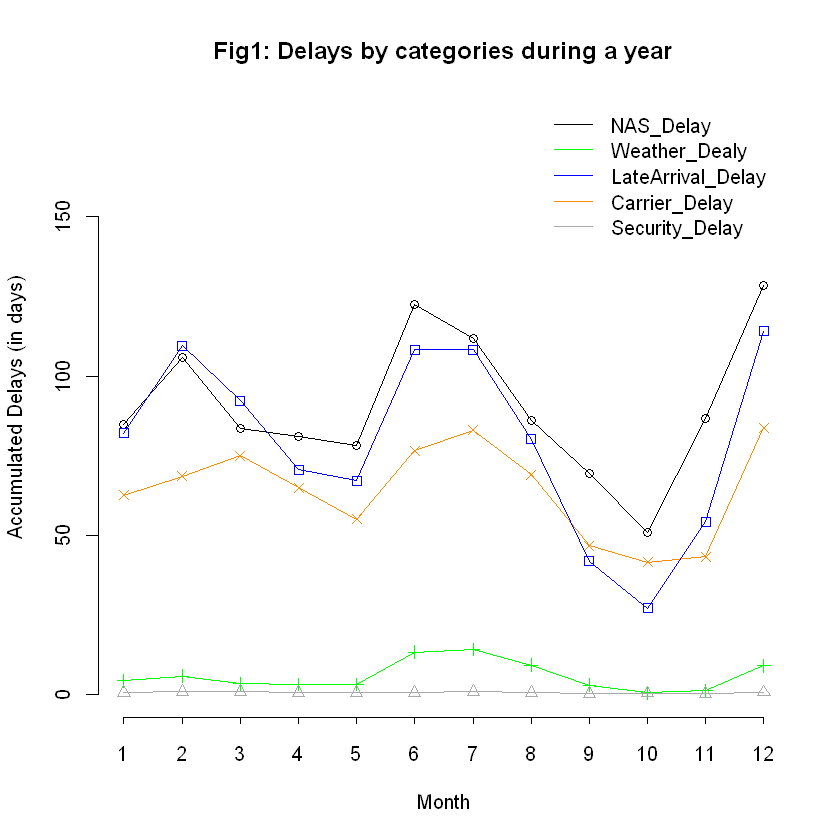

In [11]:
# Line chart indicating how different categories of delays change with month in year 2008
plot(cd,type = "o", col = "darkorange", xlab = "Month", ylab = "Accumulated Delays (in days)",
    ylim=c(0,180),bty="n",xaxt='n', pch=4,lwd=1.5)
title("Fig1: Delays by categories during a year",cex = 2,)
lines(wd, type = "o", col = "green", pch=3,lwd=1.5)
lines(nd, type = "o", col = "black", pch=1,lwd=1.5)
lines(sd, type = "o", col = "darkgrey", pch=2,lwd=1.5)
lines(ld, type = "o", col = "blue", pch=0,lwd=1.5)
axis(1, at=c(1:12), labels=c(1:12),lty=1,col="black",tck=-0.01)

legend("topright", legend=c("NAS_Delay", "Weather_Dealy","LateArrival_Delay","Carrier_Delay","Security_Delay"),
       col=c("black","green","blue","darkorange","darkgrey"), lty=1, cex=1, box.lty=0,lwd=1.5)

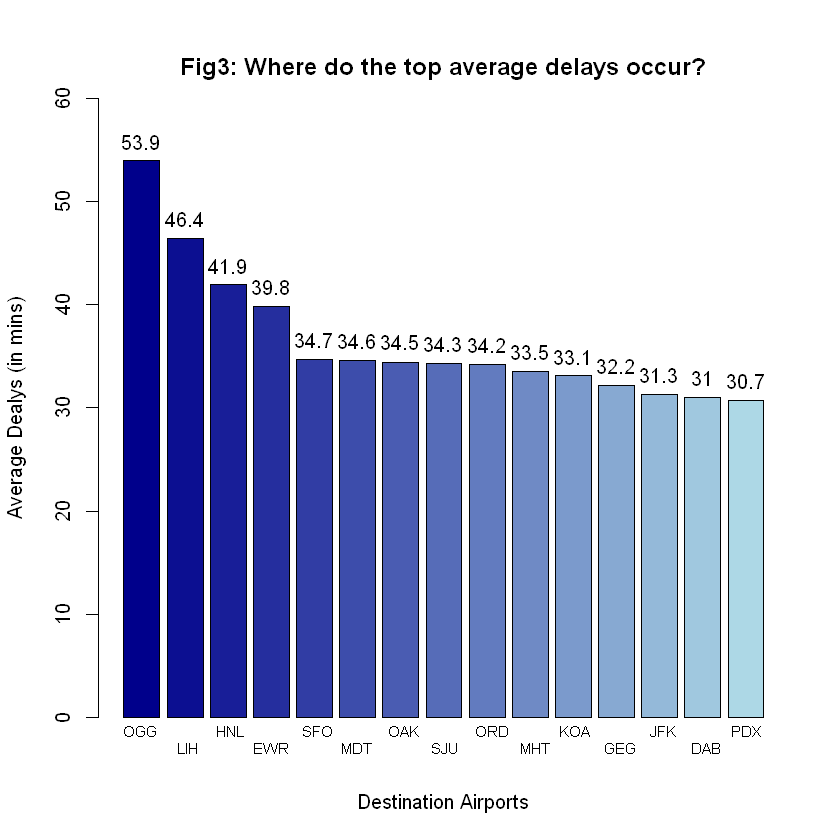

In [12]:
# Bar Chart for the top 15 Destination Airports with most significant average delays
colfunc <- colorRampPalette(c("dark blue","light blue"))

df3 <- aggregate(US_NNA[, 17], list(US_NNA$Dest), sum)
colnames(df3) <- c("iata_code","Sum_ArrDelay")
df4 <- merge(df3,df,by="iata_code")
df4$avg_delay <- df4$Sum_ArrDelay/df4$US_visits
bar_data <- df4[order(df4$avg_delay, decreasing = TRUE),]
bar_data <- bar_data[1:15,]
xx <- barplot(bar_data$avg_delay, cex.names=0.5,
       col=colfunc(15), ylab='Average Dealys (in mins)', xlab='Destination Airports', ylim=c(0,60))

labels1 <- bar_data$iata_code[c(1,3,5,7,9,11,13,15,17,19)]
labels2 <- bar_data$iata_code[c(2,4,6,8,10,12,14,16,18,20)]
mtext(labels1, side=1,at =c(0.65,3.15,5.6,8,10.45,12.75,15.2,17.5,20,22.35), cex =.75, line = 0)
mtext(labels2, side=1, at = c(2,4.3,6.7,9.15,11.65,14,16.4,18.8,21.2,23.55), cex =.75, line = 0.7)

values <- round(bar_data$avg_delay,1)

text(x = xx, y = values, label = values, pos = 3, cex = 1, col = "black")
title('Fig3: Where do the top average delays occur?', cex = 1.5,   font.main= 2, line=1)

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


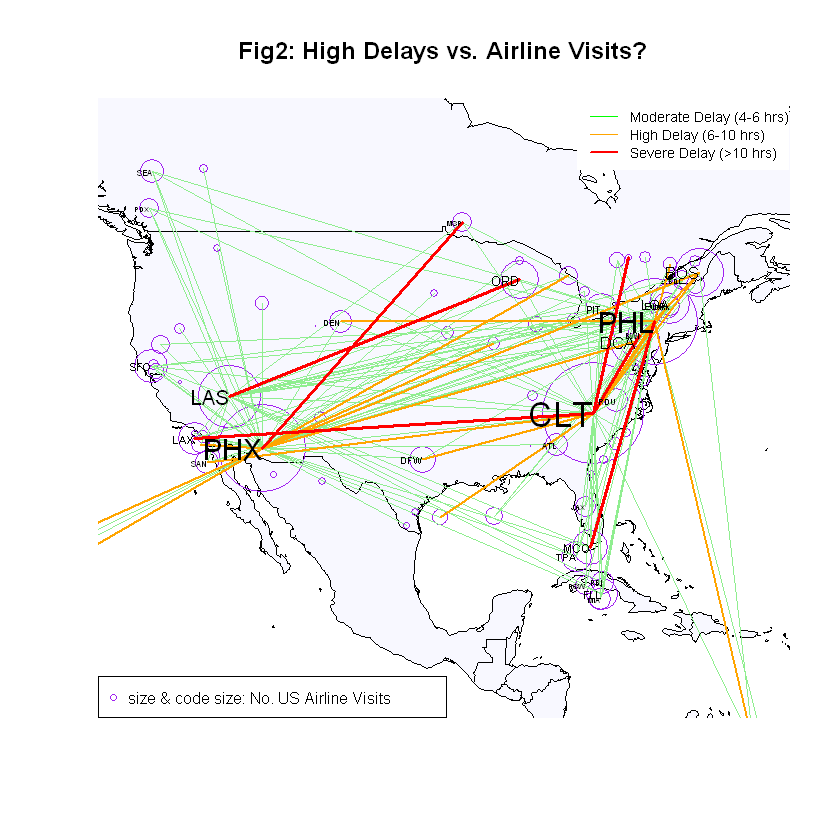

In [13]:
# Map plot to visualize the flight routes where extreme delays occured
# The circle and code size also show the number of visits by US airline at each airport 
colfunc <- colorRampPalette(c("green","red"))
library(rworldmap)
newmap <- getMap(resolution = "low")
plot(newmap,  ylim=c(21, 50), xlim=c(-125, -65), col = "ghostwhite")
par(new=TRUE)

plot(latitude_deg ~ longitude_deg, data = airports,
cex=sqrt(US_visits)/15, ylim=c(21, 50), xlim=c(-125, -65), axes=FALSE, xlab="", ylab="", col="purple")
title("Fig2: High Delays vs. Airline Visits?")

legend("bottomleft", legend=c("size & code size: No. US Airline Visits"), pch=c(1),cex=0.8, col="purple")

with(subset(US_NNA, ArrDelay>240& ArrDelay<500), segments(longOrigin, latOrigin,
longDest, latDest, col="lightgreen", lwd=1))

with(subset(US_NNA, ArrDelay>500 & ArrDelay<600), segments(longOrigin, latOrigin,
longDest, latDest, col="orange", lwd=2))

with(subset(US_NNA, ArrDelay>600), segments(longOrigin, latOrigin,
longDest, latDest, col="red", lwd=2.5))


text(latitude_deg ~ longitude_deg, label=iata_code,data = subset(airports, US_visits>1000), 
     ylim=c(21, 50), xlim=c(-125, -65),cex=sqrt(US_visits)/100, adj=1)

legend("topright", legend=c("Moderate Delay (4-6 hrs)", "High Delay (6-10 hrs)", "Severe Delay (>10 hrs)"),
       col=c("green", "orange","red"), lty=1, lwd=c(1,1.5,2), cex=0.7, box.lty=0)